In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## чтение данных и начальный анализ

In [2]:
train = pd.read_csv("train.csv")
train

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2012-3,401,0.0,5,30,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1697000
99996,99996,2012-3,59,0.0,4,34,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,3620000
99997,99997,2012-3,253,NaN,3,52,2,0,5.0,NaN,...,0,0,0,0,0,0,0,0,0,6712000
99998,99998,2012-3,305,1.0,3,181,5,1,5.0,NaN,...,0,0,0,0,0,0,0,0,0,20835000


In [3]:
test = pd.read_csv("test.csv")
test

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,2012-3,459,NaN,1,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,2012-3,344,1.0,10,52,2,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100002,2012-3,585,0.0,4,54,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,2012-3,494,NaN,2,52,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,100004,2012-3,622,1.0,9,60,3,1,15.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,2013-9,613,1.0,2,34,1,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99996,199996,2013-9,167,1.0,10,61,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99997,199997,2013-9,391,1.0,9,34,1,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99998,199998,2013-9,21,0.0,7,58,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,100000.000000,70265.000000,100000.000000,100000.00000,100000.000000,100000.000000,95104.000000,70008.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,1.000000e+05
mean,49999.500000,334.479290,0.529837,5.267680,52.25343,2.118680,0.396740,22.154431,0.500986,2.470910,...,0.004360,0.001430,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021,5.138396e+06
std,28867.657797,194.004755,0.573645,3.905558,17.79250,0.829688,0.547632,8.286241,0.500003,1.944981,...,0.065887,0.037788,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449,4.187469e+06
min,0.000000,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.480000e+05
25%,24999.750000,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.644000e+06
50%,49999.500000,334.000000,0.000000,4.000000,52.00000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.090000e+06
75%,74999.250000,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.281000e+06
max,99999.000000,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.054800e+07


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  70265 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  95104 non-null   float64
 9   g_lift      70008 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

## работа с временем

In [6]:
type(train["date"][0])

str

In [7]:
datetime = pd.DatetimeIndex(train["date"])
datetime

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2012-03-01', '2012-03-01', '2012-03-01', '2012-03-01',
               '2012-03-01', '2012-03-01', '2012-03-01', '2012-03-01',
               '2012-03-01', '2012-03-01'],
              dtype='datetime64[ns]', name='date', length=100000, freq=None)

In [8]:
datetime = (datetime.year - 2011) * 12 + datetime.month
datetime

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
           dtype='int64', name='date', length=100000)

In [9]:
train["date"] = datetime
train

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,15,401,0.0,5,30,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1697000
99996,99996,15,59,0.0,4,34,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,3620000
99997,99997,15,253,NaN,3,52,2,0,5.0,NaN,...,0,0,0,0,0,0,0,0,0,6712000
99998,99998,15,305,1.0,3,181,5,1,5.0,NaN,...,0,0,0,0,0,0,0,0,0,20835000


# filling Null

In [10]:
train = train.fillna(train.mean())

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  int64  
 2   street_id   100000 non-null  int64  
 3   build_tech  100000 non-null  float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  100000 non-null  float64
 9   g_lift      100000 non-null  float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [12]:
test["date"] = (pd.DatetimeIndex(test["date"]).year - 2011)*12 + pd.DatetimeIndex(test["date"]).month
test

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,15,459,NaN,1,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,15,344,1.0,10,52,2,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100002,15,585,0.0,4,54,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,494,NaN,2,52,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,100004,15,622,1.0,9,60,3,1,15.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,33,613,1.0,2,34,1,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99996,199996,33,167,1.0,10,61,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99997,199997,33,391,1.0,9,34,1,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99998,199998,33,21,0.0,7,58,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test = test.fillna(train.mean())

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  int64  
 2   street_id   100000 non-null  int64  
 3   build_tech  100000 non-null  float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  100000 non-null  float64
 9   g_lift      100000 non-null  float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

# добавляем новые фичи

In [15]:
train["area_per_room"] = train["area"]/train["rooms"]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100000 non-null  int64  
 1   date           100000 non-null  int64  
 2   street_id      100000 non-null  int64  
 3   build_tech     100000 non-null  float64
 4   floor          100000 non-null  int64  
 5   area           100000 non-null  int64  
 6   rooms          100000 non-null  int64  
 7   balcon         100000 non-null  int64  
 8   metro_dist     100000 non-null  float64
 9   g_lift         100000 non-null  float64
 10  n_photos       100000 non-null  int64  
 11  kw1            100000 non-null  int64  
 12  kw2            100000 non-null  int64  
 13  kw3            100000 non-null  int64  
 14  kw4            100000 non-null  int64  
 15  kw5            100000 non-null  int64  
 16  kw6            100000 non-null  int64  
 17  kw7            100000 non-null

In [16]:
test["area_per_room"] = test["area"]/test["rooms"]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100000 non-null  int64  
 1   date           100000 non-null  int64  
 2   street_id      100000 non-null  int64  
 3   build_tech     100000 non-null  float64
 4   floor          100000 non-null  int64  
 5   area           100000 non-null  int64  
 6   rooms          100000 non-null  int64  
 7   balcon         100000 non-null  int64  
 8   metro_dist     100000 non-null  float64
 9   g_lift         100000 non-null  float64
 10  n_photos       100000 non-null  int64  
 11  kw1            100000 non-null  int64  
 12  kw2            100000 non-null  int64  
 13  kw3            100000 non-null  int64  
 14  kw4            100000 non-null  int64  
 15  kw5            100000 non-null  int64  
 16  kw6            100000 non-null  int64  
 17  kw7            100000 non-null

In [17]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,area_per_room
id,1.000000,0.681210,0.000245,-0.002256,0.000173,-0.000767,-0.002868,-0.002670,0.003934,-0.005087,-0.000456,0.000561,0.006195,-0.005825,0.004147,0.002311,-0.000646,-0.000417,-0.005935,0.000547,0.003901,0.000012,0.002174,0.004167,0.057665,0.004481
date,0.681210,1.000000,-0.000155,-0.001773,0.004019,-0.001541,0.000105,-0.002016,0.002375,-0.000605,0.000553,0.000813,0.008718,-0.003859,0.005863,0.001279,-0.003860,-0.002761,-0.008715,0.000133,0.000950,-0.004052,0.003099,0.008736,0.080490,-0.002356
street_id,0.000245,-0.000155,1.000000,-0.011363,-0.009430,-0.011883,0.002162,-0.009412,0.009599,-0.004273,0.007101,-0.002139,0.001743,0.000157,0.003503,0.005246,-0.006397,-0.000589,-0.000272,0.007218,-0.003298,0.004564,-0.002310,0.004244,-0.023578,-0.019259
build_tech,-0.002256,-0.001773,-0.011363,1.000000,0.150525,0.271414,0.106399,0.659944,0.013732,0.004161,0.022278,-0.000247,-0.022139,-0.068483,-0.061972,-0.046158,-0.031492,-0.021933,0.061811,0.060673,0.033334,0.011480,0.079153,0.021100,0.314310,0.151524
floor,0.000173,0.004019,-0.009430,0.150525,1.000000,0.150671,-0.001009,0.143858,0.012705,0.003027,0.003441,-0.001135,-0.038333,-0.049537,-0.004778,0.025233,0.007706,0.070087,-0.053204,0.026793,0.012333,0.004214,0.064565,0.002364,0.201177,0.198032
area,-0.000767,-0.001541,-0.011883,0.271414,0.150671,1.000000,0.791829,0.256769,0.005296,0.001173,0.170953,-0.000854,-0.062135,-0.041959,-0.019717,-0.014830,0.011360,0.005579,0.001342,-0.003729,0.096234,0.052317,0.022090,0.039629,0.662661,-0.216797
rooms,-0.002868,0.000105,0.002162,0.106399,-0.001009,0.791829,1.000000,0.100746,0.003653,0.000727,0.213999,0.000186,-0.008418,-0.012525,-0.010019,-0.005441,-0.003180,-0.007141,0.014303,0.006452,0.026909,0.017657,-0.006712,0.009572,0.377233,-0.736219
balcon,-0.002670,-0.002016,-0.009412,0.659944,0.143858,0.256769,0.100746,1.000000,0.013679,0.007135,0.020215,0.002481,-0.023451,-0.061997,-0.057685,-0.047942,-0.027416,-0.022222,0.054662,0.058816,0.033088,0.013583,0.065131,0.034869,0.292242,0.141520
metro_dist,0.003934,0.002375,0.009599,0.013732,0.012705,0.005296,0.003653,0.013679,1.000000,-0.000133,0.008605,0.003722,0.000948,-0.003790,0.002472,0.000716,0.004673,-0.002062,0.002403,0.001715,-0.002356,-0.000816,0.001986,-0.000875,-0.090147,0.002348
g_lift,-0.005087,-0.000605,-0.004273,0.004161,0.003027,0.001173,0.000727,0.007135,-0.000133,1.000000,0.002255,0.001633,-0.007604,-0.005350,-0.004357,-0.000831,-0.005120,-0.000437,-0.000956,-0.002046,0.000435,-0.004036,-0.004187,-0.000846,0.002293,-0.002076


build_tech\*balcon
build_tech\*balcon\*area


In [18]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,area_per_room
id,1.000000,0.681210,0.000245,-0.002256,0.000173,-0.000767,-0.002868,-0.002670,0.003934,-0.005087,-0.000456,0.000561,0.006195,-0.005825,0.004147,0.002311,-0.000646,-0.000417,-0.005935,0.000547,0.003901,0.000012,0.002174,0.004167,0.057665,0.004481
date,0.681210,1.000000,-0.000155,-0.001773,0.004019,-0.001541,0.000105,-0.002016,0.002375,-0.000605,0.000553,0.000813,0.008718,-0.003859,0.005863,0.001279,-0.003860,-0.002761,-0.008715,0.000133,0.000950,-0.004052,0.003099,0.008736,0.080490,-0.002356
street_id,0.000245,-0.000155,1.000000,-0.011363,-0.009430,-0.011883,0.002162,-0.009412,0.009599,-0.004273,0.007101,-0.002139,0.001743,0.000157,0.003503,0.005246,-0.006397,-0.000589,-0.000272,0.007218,-0.003298,0.004564,-0.002310,0.004244,-0.023578,-0.019259
build_tech,-0.002256,-0.001773,-0.011363,1.000000,0.150525,0.271414,0.106399,0.659944,0.013732,0.004161,0.022278,-0.000247,-0.022139,-0.068483,-0.061972,-0.046158,-0.031492,-0.021933,0.061811,0.060673,0.033334,0.011480,0.079153,0.021100,0.314310,0.151524
floor,0.000173,0.004019,-0.009430,0.150525,1.000000,0.150671,-0.001009,0.143858,0.012705,0.003027,0.003441,-0.001135,-0.038333,-0.049537,-0.004778,0.025233,0.007706,0.070087,-0.053204,0.026793,0.012333,0.004214,0.064565,0.002364,0.201177,0.198032
area,-0.000767,-0.001541,-0.011883,0.271414,0.150671,1.000000,0.791829,0.256769,0.005296,0.001173,0.170953,-0.000854,-0.062135,-0.041959,-0.019717,-0.014830,0.011360,0.005579,0.001342,-0.003729,0.096234,0.052317,0.022090,0.039629,0.662661,-0.216797
rooms,-0.002868,0.000105,0.002162,0.106399,-0.001009,0.791829,1.000000,0.100746,0.003653,0.000727,0.213999,0.000186,-0.008418,-0.012525,-0.010019,-0.005441,-0.003180,-0.007141,0.014303,0.006452,0.026909,0.017657,-0.006712,0.009572,0.377233,-0.736219
balcon,-0.002670,-0.002016,-0.009412,0.659944,0.143858,0.256769,0.100746,1.000000,0.013679,0.007135,0.020215,0.002481,-0.023451,-0.061997,-0.057685,-0.047942,-0.027416,-0.022222,0.054662,0.058816,0.033088,0.013583,0.065131,0.034869,0.292242,0.141520
metro_dist,0.003934,0.002375,0.009599,0.013732,0.012705,0.005296,0.003653,0.013679,1.000000,-0.000133,0.008605,0.003722,0.000948,-0.003790,0.002472,0.000716,0.004673,-0.002062,0.002403,0.001715,-0.002356,-0.000816,0.001986,-0.000875,-0.090147,0.002348
g_lift,-0.005087,-0.000605,-0.004273,0.004161,0.003027,0.001173,0.000727,0.007135,-0.000133,1.000000,0.002255,0.001633,-0.007604,-0.005350,-0.004357,-0.000831,-0.005120,-0.000437,-0.000956,-0.002046,0.000435,-0.004036,-0.004187,-0.000846,0.002293,-0.002076


In [19]:
train["build_tech_and_balcon"] = train["build_tech"]*train["balcon"]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  int64  
 1   date                   100000 non-null  int64  
 2   street_id              100000 non-null  int64  
 3   build_tech             100000 non-null  float64
 4   floor                  100000 non-null  int64  
 5   area                   100000 non-null  int64  
 6   rooms                  100000 non-null  int64  
 7   balcon                 100000 non-null  int64  
 8   metro_dist             100000 non-null  float64
 9   g_lift                 100000 non-null  float64
 10  n_photos               100000 non-null  int64  
 11  kw1                    100000 non-null  int64  
 12  kw2                    100000 non-null  int64  
 13  kw3                    100000 non-null  int64  
 14  kw4                    100000 non-nul

In [20]:
test["build_tech_and_balcon"] = test["build_tech"]*test["balcon"]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  int64  
 1   date                   100000 non-null  int64  
 2   street_id              100000 non-null  int64  
 3   build_tech             100000 non-null  float64
 4   floor                  100000 non-null  int64  
 5   area                   100000 non-null  int64  
 6   rooms                  100000 non-null  int64  
 7   balcon                 100000 non-null  int64  
 8   metro_dist             100000 non-null  float64
 9   g_lift                 100000 non-null  float64
 10  n_photos               100000 non-null  int64  
 11  kw1                    100000 non-null  int64  
 12  kw2                    100000 non-null  int64  
 13  kw3                    100000 non-null  int64  
 14  kw4                    100000 non-nul

In [21]:
train["build_tech_and_balcon_and_area"] = train["build_tech"]*train["balcon"]*train["area"]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [22]:
test["build_tech_and_balcon_and_area"] = test["build_tech"]*test["balcon"]*test["area"]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [23]:
train["floor_per_room"] = train["floor"]/train["rooms"]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [24]:
test["floor_per_room"] = test["floor"]/test["rooms"]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [25]:
train["area_per_balcony"] = np.where(train["balcon"] != 0, test["area"] / test["balcon"], -1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [26]:
test["area_per_balcony"] = np.where(test["balcon"] != 0, test["area"] / test["balcon"], -1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [27]:
train["area_squared"] = train["area"]**2
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [28]:
test["area_squared"] = test["area"]**2
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [29]:
train["metro_dist_cubed"] = train["metro_dist"]**3
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [30]:
test["metro_dist_cubed"] = test["metro_dist"]**3
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [31]:
train['log_area'] = np.log(train['area'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

In [32]:
test['log_area'] = np.log(test['area'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              100000 non-null  int64  
 1   date                            100000 non-null  int64  
 2   street_id                       100000 non-null  int64  
 3   build_tech                      100000 non-null  float64
 4   floor                           100000 non-null  int64  
 5   area                            100000 non-null  int64  
 6   rooms                           100000 non-null  int64  
 7   balcon                          100000 non-null  int64  
 8   metro_dist                      100000 non-null  float64
 9   g_lift                          100000 non-null  float64
 10  n_photos                        100000 non-null  int64  
 11  kw1                             100000 non-null  int64  
 12  kw2              

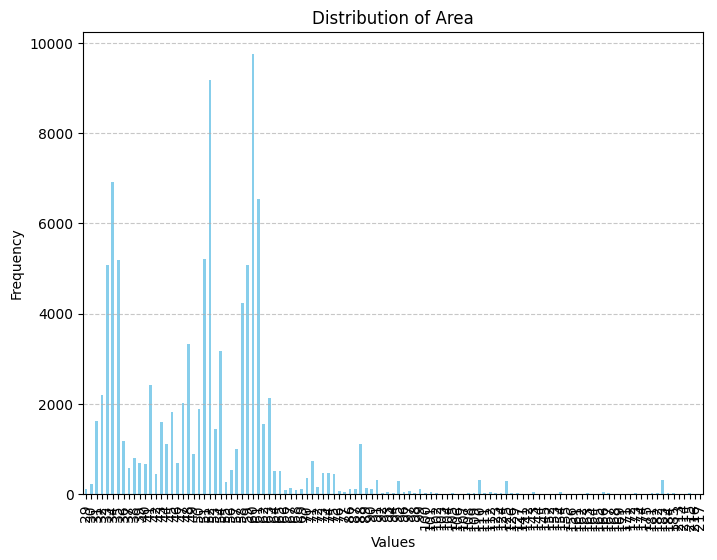

In [33]:
plt.figure(figsize=(8, 6))
train["area"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Area')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

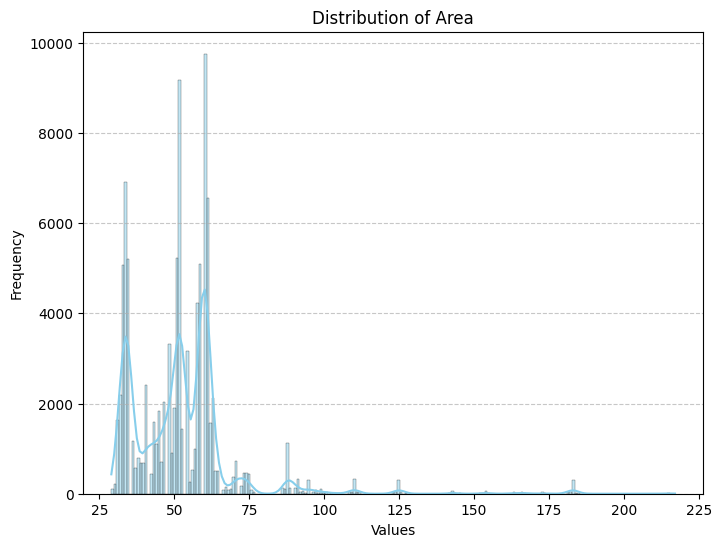

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(train["area"], color='skyblue', kde=True)
plt.title('Distribution of Area')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
train['area_bins'] = pd.cut(train['area'], bins=[0, 30, 50, 60, 85, np.inf], labels=['S', 'M', 'L', 'XL', 'XXL'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              100000 non-null  int64   
 1   date                            100000 non-null  int64   
 2   street_id                       100000 non-null  int64   
 3   build_tech                      100000 non-null  float64 
 4   floor                           100000 non-null  int64   
 5   area                            100000 non-null  int64   
 6   rooms                           100000 non-null  int64   
 7   balcon                          100000 non-null  int64   
 8   metro_dist                      100000 non-null  float64 
 9   g_lift                          100000 non-null  float64 
 10  n_photos                        100000 non-null  int64   
 11  kw1                             100000 non-null  int64   
 12  kw2

In [36]:
test['area_bins'] = pd.cut(test['area'], bins=[0, 30, 50, 60, 85, np.inf], labels=['S', 'M', 'L', 'XL', 'XXL'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              100000 non-null  int64   
 1   date                            100000 non-null  int64   
 2   street_id                       100000 non-null  int64   
 3   build_tech                      100000 non-null  float64 
 4   floor                           100000 non-null  int64   
 5   area                            100000 non-null  int64   
 6   rooms                           100000 non-null  int64   
 7   balcon                          100000 non-null  int64   
 8   metro_dist                      100000 non-null  float64 
 9   g_lift                          100000 non-null  float64 
 10  n_photos                        100000 non-null  int64   
 11  kw1                             100000 non-null  int64   
 12  kw2

In [37]:
train["k_sum_squared"] = (train["kw1"] + train["kw2"] + train["kw3"] + train["kw4"] + train["kw5"] + train["kw6"] + train["kw7"] 
+ train["kw8"] + train["kw9"] + train["kw10"] + train["kw11"] + train["kw12"] + train["kw13"])**2 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              100000 non-null  int64   
 1   date                            100000 non-null  int64   
 2   street_id                       100000 non-null  int64   
 3   build_tech                      100000 non-null  float64 
 4   floor                           100000 non-null  int64   
 5   area                            100000 non-null  int64   
 6   rooms                           100000 non-null  int64   
 7   balcon                          100000 non-null  int64   
 8   metro_dist                      100000 non-null  float64 
 9   g_lift                          100000 non-null  float64 
 10  n_photos                        100000 non-null  int64   
 11  kw1                             100000 non-null  int64   
 12  kw2

In [38]:
test["k_sum_squared"] = (test["kw1"] + test["kw2"] + test["kw3"] + test["kw4"] + test["kw5"] + test["kw6"] + test["kw7"] 
+ test["kw8"] + test["kw9"] + test["kw10"] + test["kw11"] + test["kw12"] + test["kw13"])**2 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              100000 non-null  int64   
 1   date                            100000 non-null  int64   
 2   street_id                       100000 non-null  int64   
 3   build_tech                      100000 non-null  float64 
 4   floor                           100000 non-null  int64   
 5   area                            100000 non-null  int64   
 6   rooms                           100000 non-null  int64   
 7   balcon                          100000 non-null  int64   
 8   metro_dist                      100000 non-null  float64 
 9   g_lift                          100000 non-null  float64 
 10  n_photos                        100000 non-null  int64   
 11  kw1                             100000 non-null  int64   
 12  kw2

In [39]:
train.describe()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,price,area_per_room,build_tech_and_balcon,build_tech_and_balcon_and_area,floor_per_room,area_per_balcony,area_squared,metro_dist_cubed,log_area,k_sum_squared
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,10.489170,334.479290,0.529837,5.267680,52.25343,2.118680,0.396740,22.154431,0.500986,...,5.138396e+06,26.558625,0.383989,22.948530,3.020782,inf,3046.990830,14795.930558,3.911535,0.852360
std,28867.657797,6.851589,194.004755,0.480853,3.905558,17.79250,0.829688,0.547632,8.080847,0.418355,...,4.187469e+06,6.574378,0.684079,49.043725,2.912052,NaN,3013.800819,10458.360624,0.287981,0.964413
min,0.000000,1.000000,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,...,4.480000e+05,17.333333,0.000000,0.000000,0.166667,-1.0,841.000000,0.000000,3.367296,0.000000
25%,24999.750000,5.000000,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,...,2.644000e+06,20.333333,0.000000,0.000000,1.000000,-1.0,1600.000000,3375.000000,3.688879,0.000000
50%,49999.500000,9.000000,334.000000,0.529837,4.000000,52.00000,2.000000,0.000000,25.000000,0.500986,...,4.090000e+06,25.500000,0.000000,0.000000,2.000000,-1.0,2704.000000,15625.000000,3.951244,1.000000
75%,74999.250000,14.000000,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,...,6.281000e+06,33.000000,1.000000,35.000000,4.000000,61.0,3600.000000,27000.000000,4.094345,1.000000
max,99999.000000,24.000000,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,...,8.054800e+07,53.000000,4.000000,868.000000,25.000000,inf,47089.000000,27000.000000,5.379897,9.000000


In [40]:
type(train["area_per_balcony"][0])

numpy.float64

In [41]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,area_per_room,build_tech_and_balcon,build_tech_and_balcon_and_area,floor_per_room,area_per_balcony,area_squared,metro_dist_cubed,log_area,k_sum_squared
id,1.000000,0.681210,0.000245,-0.002256,0.000173,-0.000767,-0.002868,-0.002670,0.003934,-0.005087,-0.000456,0.000561,0.006195,-0.005825,0.004147,0.002311,-0.000646,-0.000417,-0.005935,0.000547,0.003901,0.000012,0.002174,0.004167,0.057665,0.004481,-0.000952,0.000175,0.001309,-0.001443,-0.000472,0.002695,-0.001221,0.005329
date,0.681210,1.000000,-0.000155,-0.001773,0.004019,-0.001541,0.000105,-0.002016,0.002375,-0.000605,0.000553,0.000813,0.008718,-0.003859,0.005863,0.001279,-0.003860,-0.002761,-0.008715,0.000133,0.000950,-0.004052,0.003099,0.008736,0.080490,-0.002356,-0.002140,-0.001880,0.002963,-0.002061,-0.002217,0.001921,-0.000764,0.006368
street_id,0.000245,-0.000155,1.000000,-0.011363,-0.009430,-0.011883,0.002162,-0.009412,0.009599,-0.004273,0.007101,-0.002139,0.001743,0.000157,0.003503,0.005246,-0.006397,-0.000589,-0.000272,0.007218,-0.003298,0.004564,-0.002310,0.004244,-0.023578,-0.019259,-0.011373,-0.012183,-0.010276,-0.010007,-0.011232,0.008980,-0.010039,0.002881
build_tech,-0.002256,-0.001773,-0.011363,1.000000,0.150525,0.271414,0.106399,0.659944,0.013732,0.004161,0.022278,-0.000247,-0.022139,-0.068483,-0.061972,-0.046158,-0.031492,-0.021933,0.061811,0.060673,0.033334,0.011480,0.079153,0.021100,0.314310,0.151524,0.718797,0.635737,0.073385,0.476435,0.222667,0.014010,0.284383,-0.013857
floor,0.000173,0.004019,-0.009430,0.150525,1.000000,0.150671,-0.001009,0.143858,0.012705,0.003027,0.003441,-0.001135,-0.038333,-0.049537,-0.004778,0.025233,0.007706,0.070087,-0.053204,0.026793,0.012333,0.004214,0.064565,0.002364,0.201177,0.198032,0.210223,0.207240,0.786759,0.042704,0.121193,0.011049,0.154178,-0.023828
area,-0.000767,-0.001541,-0.011883,0.271414,0.150671,1.000000,0.791829,0.256769,0.005296,0.001173,0.170953,-0.000854,-0.062135,-0.041959,-0.019717,-0.014830,0.011360,0.005579,0.001342,-0.003729,0.096234,0.052317,0.022090,0.039629,0.662661,-0.216797,0.236933,0.435079,-0.248188,0.188611,0.939442,0.007647,0.949479,-0.034962
rooms,-0.002868,0.000105,0.002162,0.106399,-0.001009,0.791829,1.000000,0.100746,0.003653,0.000727,0.213999,0.000186,-0.008418,-0.012525,-0.010019,-0.005441,-0.003180,-0.007141,0.014303,0.006452,0.026909,0.017657,-0.006712,0.009572,0.377233,-0.736219,0.067808,0.200350,-0.468691,0.087304,0.616745,0.005977,0.882248,-0.003459
balcon,-0.002670,-0.002016,-0.009412,0.659944,0.143858,0.256769,0.100746,1.000000,0.013679,0.007135,0.020215,0.002481,-0.023451,-0.061997,-0.057685,-0.047942,-0.027416,-0.022222,0.054662,0.058816,0.033088,0.013583,0.065131,0.034869,0.292242,0.141520,0.871258,0.761542,0.070850,0.895990,0.211721,0.013938,0.267985,-0.013151
metro_dist,0.003934,0.002375,0.009599,0.013732,0.012705,0.005296,0.003653,0.013679,1.000000,-0.000133,0.008605,0.003722,0.000948,-0.003790,0.002472,0.000716,0.004673,-0.002062,0.002403,0.001715,-0.002356,-0.000816,0.001986,-0.000875,-0.090147,0.002348,0.011735,0.010534,0.009809,0.011249,0.001538,0.943251,0.008818,0.003742
g_lift,-0.005087,-0.000605,-0.004273,0.004161,0.003027,0.001173,0.000727,0.007135,-0.000133,1.000000,0.002255,0.001633,-0.007604,-0.005350,-0.004357,-0.000831,-0.005120,-0.000437,-0.000956,-0.002046,0.000435,-0.004036,-0.004187,-0.000846,0.002293,-0.002076,0.003634,0.001651,-0.000131,0.000991,0.000601,0.000473,0.001744,-0.005917


малая корреляция с ценой: floor_per_room, kw9, kw8, g_lift

### работаем с  numpy.float64 и Nan


In [42]:
train.replace([np.float64], -1, inplace=True)

AttributeError: 'getset_descriptor' object has no attribute 'kind'

In [43]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [44]:
train.replace(np.float64, -1, inplace=True)

TypeError: Expecting 'to_replace' to be either a scalar, array-like, dict or None, got invalid type 'type'

# добавление обученного результата

In [42]:
pd.read_csv("StandardScaler_CatBoostRegressor_1_000_000_new_features_v2.csv")["price"]

0        8.435871e+06
1        4.796319e+06
2        4.122140e+06
3        3.554165e+06
4        6.489085e+06
             ...     
99995    2.190778e+06
99996    6.301760e+06
99997    4.682007e+06
99998    3.188669e+06
99999    5.176491e+06
Name: price, Length: 100000, dtype: float64

In [43]:
train["train_X2_CatBoostRegressor_1_000_000_new_features_v2"] = pd.read_csv("train_X2_CatBoostRegressor_1_000_000_new_features_v2.csv")["price"]

In [44]:
train["trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2"] = pd.read_csv("trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2.csv")["price"]

In [45]:
train

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,build_tech_and_balcon_and_area,floor_per_room,area_per_balcony,area_squared,metro_dist_cubed,log_area,area_bins,k_sum_squared,train_X2_CatBoostRegressor_1_000_000_new_features_v2,trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2
0,0,1,560,0.529837,2,59,3,0,30.0,1.000000,...,0.000000,0.666667,-1.0,3481,27000.0,4.077537,L,1,4.340640e+06,4.353102e+06
1,1,1,667,0.529837,10,50,2,1,25.0,0.500986,...,26.491852,5.000000,52.0,2500,15625.0,3.912023,M,1,1.339152e+07,1.260514e+07
2,2,1,90,0.000000,1,48,2,0,25.0,0.000000,...,0.000000,0.500000,-1.0,2304,15625.0,3.871201,M,1,2.082281e+06,1.884546e+06
3,3,1,94,1.000000,3,62,3,1,30.0,0.500986,...,62.000000,1.000000,52.0,3844,27000.0,4.127134,XL,1,1.387173e+07,1.449690e+07
4,4,1,232,0.000000,3,60,3,0,25.0,0.500986,...,0.000000,1.000000,-1.0,3600,15625.0,4.094345,L,1,3.725524e+06,3.925495e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,15,401,0.000000,5,30,1,0,30.0,0.500986,...,0.000000,5.000000,-1.0,900,27000.0,3.401197,S,0,1.580813e+06,1.573949e+06
99996,99996,15,59,0.000000,4,34,1,0,30.0,0.500986,...,0.000000,4.000000,-1.0,1156,27000.0,3.526361,M,1,3.674952e+06,3.550653e+06
99997,99997,15,253,0.529837,3,52,2,0,5.0,0.500986,...,0.000000,1.500000,-1.0,2704,125.0,3.951244,L,1,5.913622e+06,5.636775e+06
99998,99998,15,305,1.000000,3,181,5,1,5.0,0.500986,...,181.000000,0.600000,inf,32761,125.0,5.198497,XXL,0,2.062053e+07,2.212096e+07


In [46]:
test["train_X2_CatBoostRegressor_1_000_000_new_features_v2"] = pd.read_csv("X2_CatBoostRegressor_1_000_000_new_features_v2.csv")["price"]

In [47]:
test["trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2"] = pd.read_csv("StandardScaler_CatBoostRegressor_1_000_000_new_features_v2.csv")["price"]

In [48]:
test

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,build_tech_and_balcon_and_area,floor_per_room,area_per_balcony,area_squared,metro_dist_cubed,log_area,area_bins,k_sum_squared,train_X2_CatBoostRegressor_1_000_000_new_features_v2,trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2
0,100000,15,459,0.529837,1,60,3,1,30.000000,0.000000,...,31.790223,0.333333,60.0,3600,27000.000000,4.094345,L,0,8.954395e+06,8.435871e+06
1,100001,15,344,1.000000,10,52,2,1,22.154431,0.500986,...,52.000000,5.000000,52.0,2704,10873.811434,3.951244,L,0,4.712833e+06,4.796319e+06
2,100002,15,585,0.000000,4,54,3,0,30.000000,0.000000,...,0.000000,1.333333,-1.0,2916,27000.000000,3.988984,L,0,3.881894e+06,4.122140e+06
3,100003,15,494,0.529837,2,52,2,1,25.000000,1.000000,...,27.551526,1.000000,52.0,2704,15625.000000,3.951244,L,1,3.057418e+06,3.554165e+06
4,100004,15,622,1.000000,9,60,3,1,15.000000,0.500986,...,60.000000,3.000000,60.0,3600,3375.000000,4.094345,L,4,6.425111e+06,6.489085e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,33,613,1.000000,2,34,1,1,25.000000,0.500986,...,34.000000,2.000000,34.0,1156,15625.000000,3.526361,M,1,2.086396e+06,2.190778e+06
99996,199996,33,167,1.000000,10,61,3,1,30.000000,0.500986,...,61.000000,3.333333,61.0,3721,27000.000000,4.110874,XL,1,6.997350e+06,6.301760e+06
99997,199997,33,391,1.000000,9,34,1,1,30.000000,0.500986,...,34.000000,9.000000,34.0,1156,27000.000000,3.526361,M,1,4.200264e+06,4.682007e+06
99998,199998,33,21,0.000000,7,58,3,0,30.000000,0.000000,...,0.000000,2.333333,-1.0,3364,27000.000000,4.060443,L,0,3.106819e+06,3.188669e+06


In [49]:
train[["price", "train_X2_CatBoostRegressor_1_000_000_new_features_v2", "trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2"]]

,price,train_X2_CatBoostRegressor_1_000_000_new_features_v2,trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2
0,4510000,4.340640e+06,4.353102e+06
1,13231000,1.339152e+07,1.260514e+07
2,2008000,2.082281e+06,1.884546e+06
3,12680000,1.387173e+07,1.449690e+07
4,3335000,3.725524e+06,3.925495e+06
...,...,...,...
99995,1697000,1.580813e+06,1.573949e+06
99996,3620000,3.674952e+06,3.550653e+06
99997,6712000,5.913622e+06,5.636775e+06
99998,20835000,2.062053e+07,2.212096e+07


In [50]:
corr = train[["price", "train_X2_CatBoostRegressor_1_000_000_new_features_v2", "trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,train_X2_CatBoostRegressor_1_000_000_new_features_v2,trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2
price,1.000000,0.991294,0.981335
train_X2_CatBoostRegressor_1_000_000_new_features_v2,0.991294,1.000000,0.994428
trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2,0.981335,0.994428,1.000000


## разбиение для fit

In [51]:
X = train.drop(columns=["price"])
X

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,build_tech_and_balcon_and_area,floor_per_room,area_per_balcony,area_squared,metro_dist_cubed,log_area,area_bins,k_sum_squared,train_X2_CatBoostRegressor_1_000_000_new_features_v2,trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2
0,0,1,560,0.529837,2,59,3,0,30.0,1.000000,...,0.000000,0.666667,-1.0,3481,27000.0,4.077537,L,1,4.340640e+06,4.353102e+06
1,1,1,667,0.529837,10,50,2,1,25.0,0.500986,...,26.491852,5.000000,52.0,2500,15625.0,3.912023,M,1,1.339152e+07,1.260514e+07
2,2,1,90,0.000000,1,48,2,0,25.0,0.000000,...,0.000000,0.500000,-1.0,2304,15625.0,3.871201,M,1,2.082281e+06,1.884546e+06
3,3,1,94,1.000000,3,62,3,1,30.0,0.500986,...,62.000000,1.000000,52.0,3844,27000.0,4.127134,XL,1,1.387173e+07,1.449690e+07
4,4,1,232,0.000000,3,60,3,0,25.0,0.500986,...,0.000000,1.000000,-1.0,3600,15625.0,4.094345,L,1,3.725524e+06,3.925495e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,15,401,0.000000,5,30,1,0,30.0,0.500986,...,0.000000,5.000000,-1.0,900,27000.0,3.401197,S,0,1.580813e+06,1.573949e+06
99996,99996,15,59,0.000000,4,34,1,0,30.0,0.500986,...,0.000000,4.000000,-1.0,1156,27000.0,3.526361,M,1,3.674952e+06,3.550653e+06
99997,99997,15,253,0.529837,3,52,2,0,5.0,0.500986,...,0.000000,1.500000,-1.0,2704,125.0,3.951244,L,1,5.913622e+06,5.636775e+06
99998,99998,15,305,1.000000,3,181,5,1,5.0,0.500986,...,181.000000,0.600000,inf,32761,125.0,5.198497,XXL,0,2.062053e+07,2.212096e+07


In [52]:
y = train["price"]
y

0         4510000
1        13231000
2         2008000
3        12680000
4         3335000
           ...   
99995     1697000
99996     3620000
99997     6712000
99998    20835000
99999     2909000
Name: price, Length: 100000, dtype: int64

# нормализация и обучение

In [53]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [54]:
from catboost import CatBoostRegressor

In [19]:
# RobustScaler_CatBoostRegressor_10000_42_MSE 3.2384028969256014e-7 
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

In [27]:
# MinMaxScaler_CatBoostRegressor_10000_42_MSE 3.2384028969256014e-7
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [55]:
# best 3.2384028969256014e-7
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count   Dtype   
---  ------                                                           --------------   -----   
 0   id                                                               100000 non-null  int64   
 1   date                                                             100000 non-null  int64   
 2   street_id                                                        100000 non-null  int64   
 3   build_tech                                                       100000 non-null  float64 
 4   floor                                                            100000 non-null  int64   
 5   area                                                             100000 non-null  int64   
 6   rooms                                                            100000 non-null  int64   
 7   balcon               

In [59]:
categorial_features = ('street_id', 'balcon', 'rooms', "area_bins")
numeric_features = ('date', 'build_tech', #'g_lift',
                    'floor', 'area', 'metro_dist',
                    'kw1', 'kw2', 'kw3',
                    'kw4', 'kw5', 'kw6',
                    'kw7',# 'kw8', 'kw9',
                    'kw10', 'kw11', 'kw12',
                    'kw13', "area_per_room", 
                    "build_tech_and_balcon", 
                    "build_tech_and_balcon_and_area", 
                    #"floor_per_room", #"area_per_balcony","area_squared", # что-то криво получилось(((
                    "metro_dist_cubed", "log_area", "k_sum_squared", 
                    "trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2",
                    "train_X2_CatBoostRegressor_1_000_000_new_features_v2")
# id - не помогает)
#малая корреляция с ценой: floor_per_room, kw9, kw8, g_lift

In [60]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVR

In [61]:
pipe = Pipeline([
    ('preproc', ColumnTransformer([
            ('numeric', num_pipeline, numeric_features),
            ('categorial', OneHotEncoder(), categorial_features)
        ]
    )),
    ('grad_boost', CatBoostRegressor(iterations=1_000_000,
                           task_type="GPU",
                           devices=['2', "3", "4", "5"], silent=True,
                                     depth=5)),
#     ("linear_regression", LinearRegression())
#     ("SVR", LinearSVR())
#     ("LogisticRegression", LogisticRegression())
    
])

# кроссвалидация

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
        'grad_boost__iterations': [100, 500, 1000],
        'grad_boost__learning_rate': [0.01, 0.1, 1],
        'grad_boost__depth': [3, 5, 7]
    }

In [101]:
param_grid = {'l2_leaf_reg' : [1,4,8],
              'learning_rate' : [0.03,0.5,0.1],
              'depth' : [6,8,10]
             }

In [107]:
param_grid = {'grad_boost__learning_rate' : [0.1, 0.01, 0.001],
              'grad_boost__depth' : [2,4,6]
             }

In [112]:
param_grid = {'grad_boost__learning_rate' : [0.1, 0.5, 1.5],
              'grad_boost__depth' : [5,6]
             }

In [113]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)

In [75]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ('date',
                                                                          'build_tech',
                                                                          'floor',
                                                                          'area',
                                                                          'metro_dist',
                                                                          'kw1',
                                                                          'kw2',
                                                  

In [76]:
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'grad_boost__depth': 3, 'grad_boost__iterations': 1000, 'grad_boost__learning_rate': 1}


In [100]:
print(pipe['grad_boost'].get_params().keys())

dict_keys(['iterations', 'loss_function', 'silent', 'task_type', 'devices'])


In [102]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ('date',
                                                                          'build_tech',
                                                                          'floor',
                                                                          'area',
                                                                          'metro_dist',
                                                                          'kw1',
                                                                          'kw2',
                                                  

In [103]:
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'grad_boost__depth': 6, 'grad_boost__l2_leaf_reg': 1, 'grad_boost__learning_rate': 0.1}


In [109]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ('date',
                                                                          'build_tech',
                                                                          'floor',
                                                                          'area',
                                                                          'metro_dist',
                                                                          'kw1',
                                                                          'kw2',
                                                  

In [111]:
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'grad_boost__depth': 6, 'grad_boost__learning_rate': 0.1}


In [122]:
grid_search.fit(X, y)

KeyboardInterrupt: 

In [115]:
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'grad_boost__depth': 5, 'grad_boost__learning_rate': 0.5}


In [123]:
pipe.fit(X, y)

Learning rate set to 0.073844
0:	learn: 3911954.2801606	total: 8.17ms	remaining: 8.16s
1:	learn: 3656769.3630420	total: 11.5ms	remaining: 5.73s
2:	learn: 3420178.8138819	total: 14.8ms	remaining: 4.92s
3:	learn: 3199103.0643122	total: 18ms	remaining: 4.49s
4:	learn: 2994614.1204842	total: 21.5ms	remaining: 4.27s
5:	learn: 2805544.8911214	total: 25ms	remaining: 4.13s
6:	learn: 2630487.7527511	total: 28.2ms	remaining: 4s
7:	learn: 2470580.1577184	total: 31.3ms	remaining: 3.88s
8:	learn: 2322281.3050769	total: 34.4ms	remaining: 3.79s
9:	learn: 2184437.7098474	total: 37.5ms	remaining: 3.71s
10:	learn: 2059107.1628110	total: 40.6ms	remaining: 3.65s
11:	learn: 1943068.9938728	total: 43.7ms	remaining: 3.6s
12:	learn: 1836387.0146330	total: 46.8ms	remaining: 3.55s
13:	learn: 1739520.7036016	total: 49.9ms	remaining: 3.52s
14:	learn: 1651419.2962003	total: 53.1ms	remaining: 3.48s
15:	learn: 1569130.0232391	total: 57.8ms	remaining: 3.56s
16:	learn: 1495438.1239759	total: 60.8ms	remaining: 3.52s
17

162:	learn: 718819.0618194	total: 803ms	remaining: 4.13s
163:	learn: 718299.9726891	total: 806ms	remaining: 4.11s
164:	learn: 718021.4304334	total: 809ms	remaining: 4.09s
165:	learn: 717685.7503680	total: 812ms	remaining: 4.08s
166:	learn: 717003.9751838	total: 815ms	remaining: 4.07s
167:	learn: 716471.5819141	total: 818ms	remaining: 4.05s
168:	learn: 715866.7102803	total: 824ms	remaining: 4.05s
169:	learn: 715298.9158912	total: 827ms	remaining: 4.04s
170:	learn: 714975.1434150	total: 830ms	remaining: 4.02s
171:	learn: 714588.7187800	total: 833ms	remaining: 4.01s
172:	learn: 713763.3742244	total: 835ms	remaining: 3.99s
173:	learn: 712832.9360667	total: 838ms	remaining: 3.98s
174:	learn: 712399.6219777	total: 841ms	remaining: 3.97s
175:	learn: 712158.1246560	total: 844ms	remaining: 3.95s
176:	learn: 711951.2039511	total: 847ms	remaining: 3.94s
177:	learn: 711124.8517396	total: 850ms	remaining: 3.92s
178:	learn: 710701.7670178	total: 853ms	remaining: 3.91s
179:	learn: 710343.7335659	tota

359:	learn: 654549.0801218	total: 1.39s	remaining: 2.47s
360:	learn: 654087.8255896	total: 1.39s	remaining: 2.46s
361:	learn: 653916.1916056	total: 1.4s	remaining: 2.46s
362:	learn: 653802.0285842	total: 1.4s	remaining: 2.45s
363:	learn: 653601.3410548	total: 1.4s	remaining: 2.45s
364:	learn: 653440.8846832	total: 1.4s	remaining: 2.44s
365:	learn: 653077.9627167	total: 1.41s	remaining: 2.44s
366:	learn: 652772.6430941	total: 1.41s	remaining: 2.43s
367:	learn: 652570.8821097	total: 1.41s	remaining: 2.42s
368:	learn: 652367.4457305	total: 1.42s	remaining: 2.42s
369:	learn: 652171.4864937	total: 1.42s	remaining: 2.41s
370:	learn: 652037.9160156	total: 1.42s	remaining: 2.41s
371:	learn: 651785.8161043	total: 1.42s	remaining: 2.4s
372:	learn: 651584.4416676	total: 1.43s	remaining: 2.4s
373:	learn: 651292.4354084	total: 1.43s	remaining: 2.39s
374:	learn: 651130.9153481	total: 1.43s	remaining: 2.39s
375:	learn: 651008.6439398	total: 1.44s	remaining: 2.38s
376:	learn: 650841.3122591	total: 1.4

561:	learn: 621035.6096895	total: 1.98s	remaining: 1.54s
562:	learn: 620873.0321811	total: 1.98s	remaining: 1.54s
563:	learn: 620671.9388219	total: 1.98s	remaining: 1.53s
564:	learn: 620559.4115831	total: 1.99s	remaining: 1.53s
565:	learn: 620400.3784309	total: 1.99s	remaining: 1.52s
566:	learn: 620270.8721443	total: 1.99s	remaining: 1.52s
567:	learn: 620135.9713037	total: 2s	remaining: 1.52s
568:	learn: 619990.7539037	total: 2s	remaining: 1.51s
569:	learn: 619909.8357745	total: 2s	remaining: 1.51s
570:	learn: 619668.4042041	total: 2s	remaining: 1.51s
571:	learn: 619587.4439761	total: 2.01s	remaining: 1.5s
572:	learn: 619512.1234435	total: 2.01s	remaining: 1.5s
573:	learn: 619419.5633548	total: 2.01s	remaining: 1.49s
574:	learn: 619349.3540635	total: 2.02s	remaining: 1.49s
575:	learn: 619113.1497201	total: 2.02s	remaining: 1.49s
576:	learn: 619004.4675372	total: 2.02s	remaining: 1.48s
577:	learn: 618894.4477195	total: 2.03s	remaining: 1.48s
578:	learn: 618714.0922653	total: 2.03s	remai

756:	learn: 598820.5640455	total: 2.56s	remaining: 823ms
757:	learn: 598736.6951453	total: 2.57s	remaining: 819ms
758:	learn: 598648.5457196	total: 2.57s	remaining: 816ms
759:	learn: 598563.6840311	total: 2.57s	remaining: 812ms
760:	learn: 598507.3540520	total: 2.58s	remaining: 809ms
761:	learn: 598428.3934599	total: 2.58s	remaining: 805ms
762:	learn: 598315.0925569	total: 2.58s	remaining: 802ms
763:	learn: 598186.3334318	total: 2.58s	remaining: 798ms
764:	learn: 598094.4225971	total: 2.59s	remaining: 795ms
765:	learn: 597959.9955189	total: 2.59s	remaining: 791ms
766:	learn: 597847.1446520	total: 2.59s	remaining: 788ms
767:	learn: 597772.8928235	total: 2.6s	remaining: 784ms
768:	learn: 597684.6731117	total: 2.6s	remaining: 781ms
769:	learn: 597500.9704967	total: 2.6s	remaining: 777ms
770:	learn: 597451.2798727	total: 2.6s	remaining: 774ms
771:	learn: 597420.8524344	total: 2.61s	remaining: 770ms
772:	learn: 597339.5372510	total: 2.61s	remaining: 767ms
773:	learn: 597146.0366595	total: 2

953:	learn: 583375.4690444	total: 3.15s	remaining: 152ms
954:	learn: 583273.6767908	total: 3.15s	remaining: 149ms
955:	learn: 583213.1820564	total: 3.15s	remaining: 145ms
956:	learn: 583150.1953260	total: 3.16s	remaining: 142ms
957:	learn: 583117.8799958	total: 3.16s	remaining: 139ms
958:	learn: 583025.6195400	total: 3.16s	remaining: 135ms
959:	learn: 583009.7256960	total: 3.17s	remaining: 132ms
960:	learn: 582843.4497420	total: 3.17s	remaining: 129ms
961:	learn: 582797.5022810	total: 3.17s	remaining: 125ms
962:	learn: 582741.5461306	total: 3.17s	remaining: 122ms
963:	learn: 582672.5009595	total: 3.18s	remaining: 119ms
964:	learn: 582526.2573883	total: 3.18s	remaining: 115ms
965:	learn: 582447.4162285	total: 3.18s	remaining: 112ms
966:	learn: 582415.6149850	total: 3.19s	remaining: 109ms
967:	learn: 582388.5318613	total: 3.19s	remaining: 105ms
968:	learn: 582340.4834113	total: 3.19s	remaining: 102ms
969:	learn: 582262.2625272	total: 3.2s	remaining: 98.9ms
970:	learn: 582214.7384855	tota

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ('date', 'build_tech',
                                                   'floor', 'area',
                                                   'metro_dist', 'kw1', 'kw2',
                                                   'kw3', 'kw4', 'kw5', 'kw6',
                                                   'kw7', 'kw10', 'kw11',
                                                   'kw12', 'kw13',
                                                   'area_per_room',
                                                   'build_tech_and_balcon',
                                                   'build_tech_and_balcon_and_area',
                                                   'area_squared',
          

In [ ]:
pipe.fit(X, y)

In [ ]:
ans = pd.read_csv("sample_submission.csv")
ans

In [ ]:
res = pipe.predict(test)
res

In [ ]:
y

In [ ]:
ans["price"] = res
ans

In [ ]:
ans.to_csv("last_1M_v2.csv", index=False)

In [67]:
from sklearn.metrics import mean_absolute_error

In [ ]:
tmp = pd.DataFrame(pipe.predict(X), y)

In [ ]:
mean_absolute_error(pipe.predict(X), y)

In [73]:
mean_absolute_error(X["trainStandardScaler_CatBoostRegressor_1_000_000_new_features_v2"], y)

496385.96898252564

In [72]:
mean_absolute_error(X["train_X2_CatBoostRegressor_1_000_000_new_features_v2"], y)

369054.04272437963